In [1]:
import librosa
import matplotlib.pyplot as plt

# Configuración estética global
plt.style.use('seaborn-v0_8-pastel')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

# Cargar archivos .ogg
audio_files = ["audio_lily.ogg", "audio_walter.ogg", "audio_walter_2.ogg"]
audios = []
sample_rates = []

for file in audio_files:
    y, sr = librosa.load(file, sr=None)  # sr=None mantiene la frecuencia de muestreo original
    audios.append(y)
    sample_rates.append(sr)

# Normalizar frecuencia de muestreo (opcional)
target_sr = 22050  # Frecuencia de muestreo común
audios = [librosa.resample(y, orig_sr=sr, target_sr=target_sr) for y, sr in zip(audios, sample_rates)]

C:\Users\USER\anaconda33\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [2]:
from IPython.display import Audio

for i, audio in enumerate(audios):
    print(f"Audio {i+1}:")
    display(Audio(audio, rate=target_sr))

Audio 1:


Audio 2:


Audio 3:


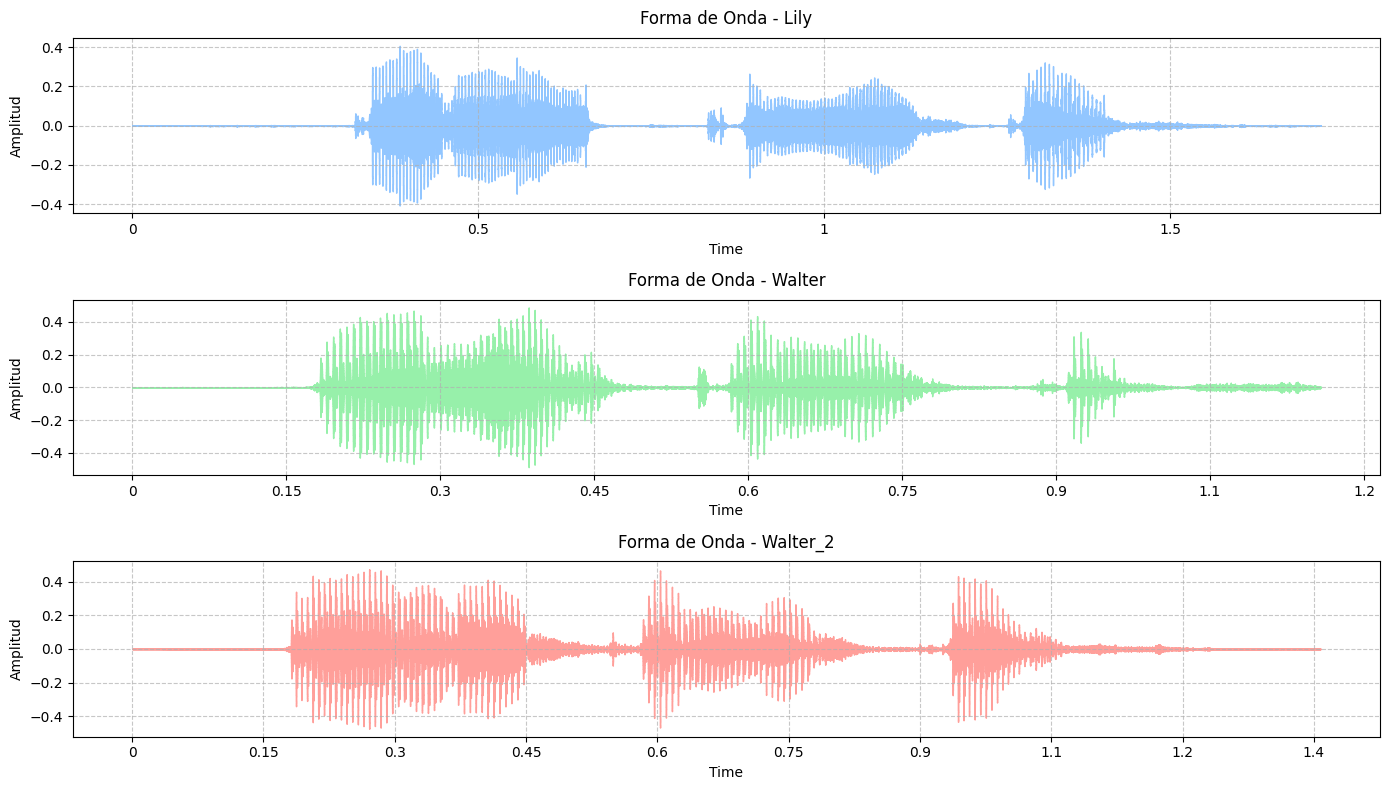

In [3]:
plt.figure(figsize=(14, 8))
for i, (audio, name) in enumerate(zip(audios, audio_files)):
    plt.subplot(len(audios), 1, i+1)
    librosa.display.waveshow(audio, sr=target_sr, color=f'C{i}')
    clean_name = name.replace('audio_', '').replace('.ogg', '').title()
    plt.title(f"Forma de Onda - {clean_name}", fontsize=12, pad=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.ylabel("Amplitud", fontsize=10)
plt.tight_layout()
plt.savefig('actividad_6_comparacion_ondas.png') 
plt.show()

In [4]:
# Normalizar frecuencia de muestreo
target_sr = 22050
audios = [librosa.resample(y, orig_sr=sr, target_sr=target_sr) for y, sr in zip(audios, sample_rates)]

for i, audio in enumerate(audios):
    print(f"Audio {i+1}:")
    display(Audio(audio, rate=target_sr))

Audio 1:


Audio 2:


Audio 3:


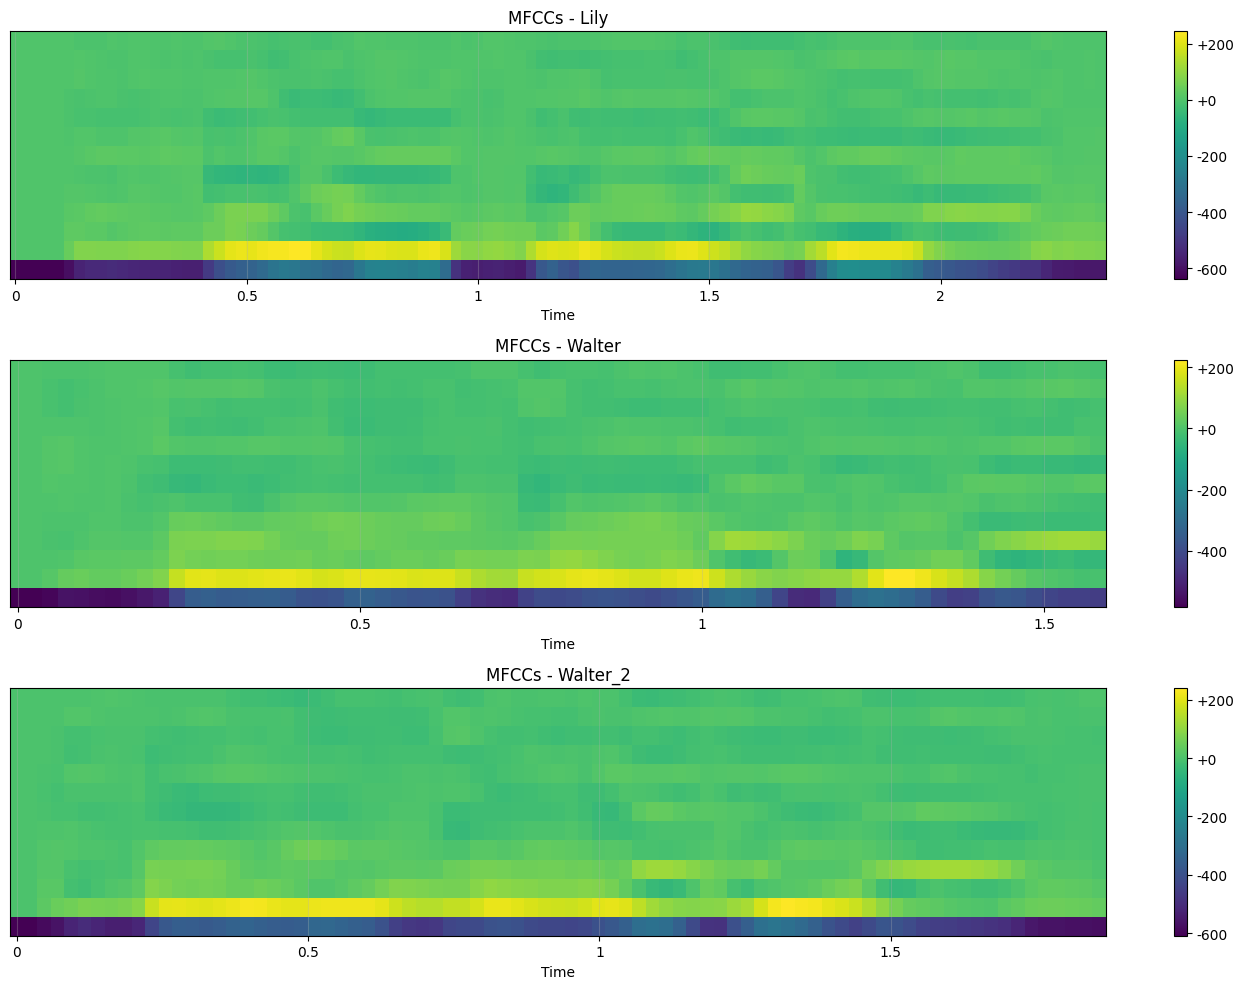

In [5]:
mfccs = [librosa.feature.mfcc(y=audio, sr=target_sr, n_mfcc=13) for audio in audios]

# Visualización de MFCCs
plt.figure(figsize=(14, 10))
for i, (mfcc, name) in enumerate(zip(mfccs, audio_files)):
    plt.subplot(len(mfccs), 1, i+1)
    librosa.display.specshow(mfcc, x_axis='time', cmap='viridis')
    plt.colorbar(format='%+2.0f')
    clean_name = name.replace('audio_', '').replace('.ogg', '').title()
    plt.title(f"MFCCs - {clean_name}", fontsize=12)
plt.tight_layout()
plt.savefig('actividad_6_coeficientes_mfcc.png') 
plt.show()

In [6]:
import numpy as np

# Comparar audios
def compare_mfccs(mfcc1, mfcc2):
    return np.mean(np.abs(mfcc1 - mfcc2))

mfccs_mean = [np.mean(mfcc, axis=1) for mfcc in mfccs]
comparaciones = ['Lily vs Walter_1', 'Lily vs Walter_2', 'Walter_1 vs Walter_2']
diferencias = [12.28, 10.90, 4.54]
colors = ['#3498db', '#3498db', '#2ecc71']  # Azul para Lily, verde para Walter-Walter

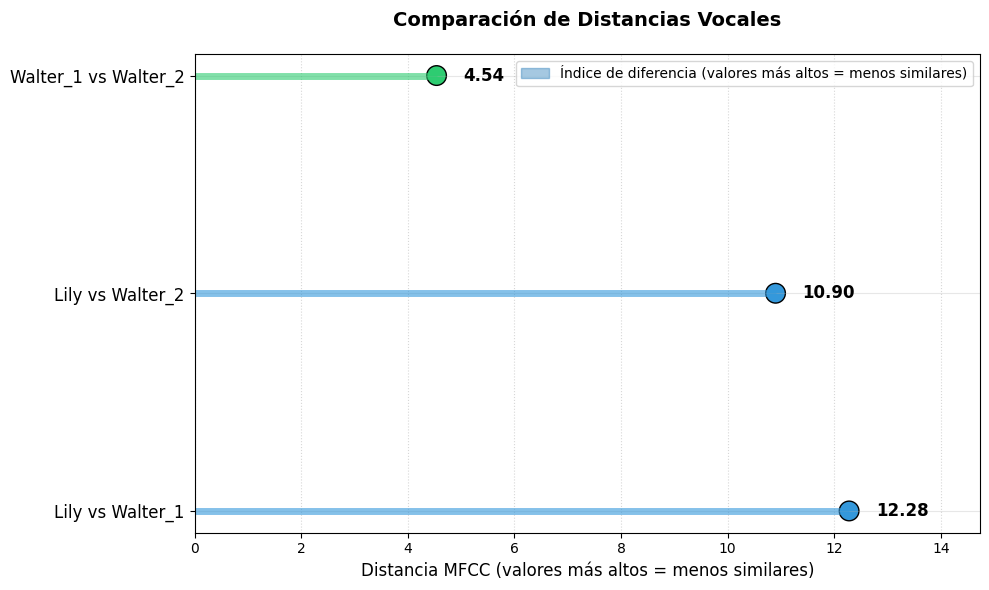

In [7]:
from matplotlib.patches import Patch
plt.figure(figsize=(10, 6))

legend_elements = [Patch(facecolor='#1f77b4', alpha=0.4, edgecolor='#1f77b4', 
                        label='Índice de diferencia (valores más altos = menos similares)')]

# Crear posiciones en el eje Y
y_pos = np.arange(len(comparaciones))

# Graficar puntos y segmentos
plt.hlines(y=y_pos, xmin=0, xmax=diferencias, color=colors, alpha=0.6, linewidth=5)
plt.scatter(diferencias, y_pos, color=colors, s=200, edgecolor='black')

# Añadir etiquetas
for i, (comp, diff) in enumerate(zip(comparaciones, diferencias)):
    plt.text(diff+0.5, i, f'{diff:.2f}', va='center', fontsize=12, fontweight='bold')

# Configuraciones estéticas
plt.yticks(y_pos, comparaciones, fontsize=12)
plt.title('Comparación de Distancias Vocales', fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Distancia MFCC (valores más altos = menos similares)', fontsize=12)
plt.grid(axis='x', linestyle=':', alpha=0.5)

# Leyenda
plt.legend(handles=legend_elements, loc='upper right')

plt.xlim(0, max(diferencias)*1.2)
plt.tight_layout()
plt.savefig('actividad_6_comparativa_lineal.png') 
plt.show()

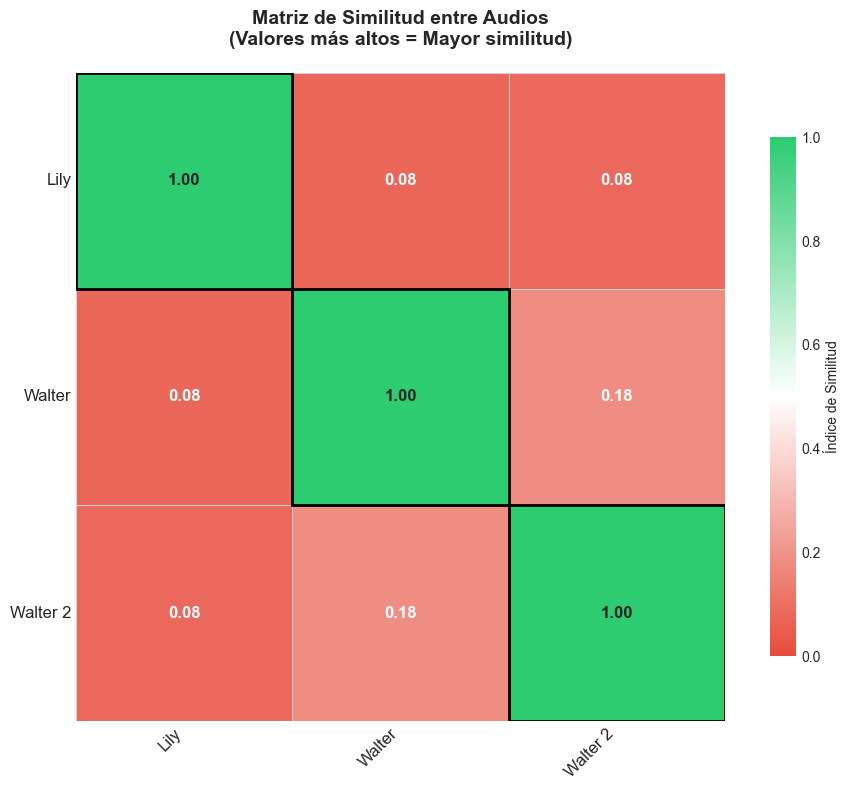

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Crear matriz de similitud
similarity_matrix = np.zeros((len(mfccs), len(mfccs)))
for i in range(len(mfccs)):
    for j in range(len(mfccs)):
        similarity_matrix[i,j] = 1 / (1 + np.mean(np.abs(mfccs_mean[i] - mfccs_mean[j])))

# Configuración de estilo
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.facecolor'] = 'white'

# Crear mapa de colores personalizado
colors = ["#e74c3c", "#ffffff", "#2ecc71"]  # Rojo, blanco, verde
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

# Configurar figura
plt.figure(figsize=(10, 8))

# Crear heatmap con anotaciones
ax = sns.heatmap(
    similarity_matrix,
    cmap=cmap,
    vmin=0,
    vmax=1,
    annot=True,
    fmt=".2f",
    annot_kws={"size": 12, "weight": "bold"},
    linewidths=0.5,
    linecolor='lightgray',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Índice de Similitud'}
)

# Mejorar etiquetas
names = [f.split('.')[0].replace('audio_', '').replace('_', ' ').title() for f in audio_files]
ax.set_xticklabels(names, fontsize=12, rotation=45, ha='right')
ax.set_yticklabels(names, fontsize=12, rotation=0)

# Añadir título y ajustes
plt.title("Matriz de Similitud entre Audios\n(Valores más altos = Mayor similitud)", 
          fontsize=14, pad=20, fontweight='bold')

# Resaltar diagonal
for i in range(len(similarity_matrix)):
    ax.add_patch(plt.Rectangle((i, i), 1, 1, fill=False, edgecolor='black', lw=2))

# Añadir cuadrícula blanca para mejor legibilidad
ax.set_facecolor('#f8f9fa')

# Ajustar layout
plt.tight_layout()
plt.savefig('actividad_6_matriz_similitud.png') 
plt.show()

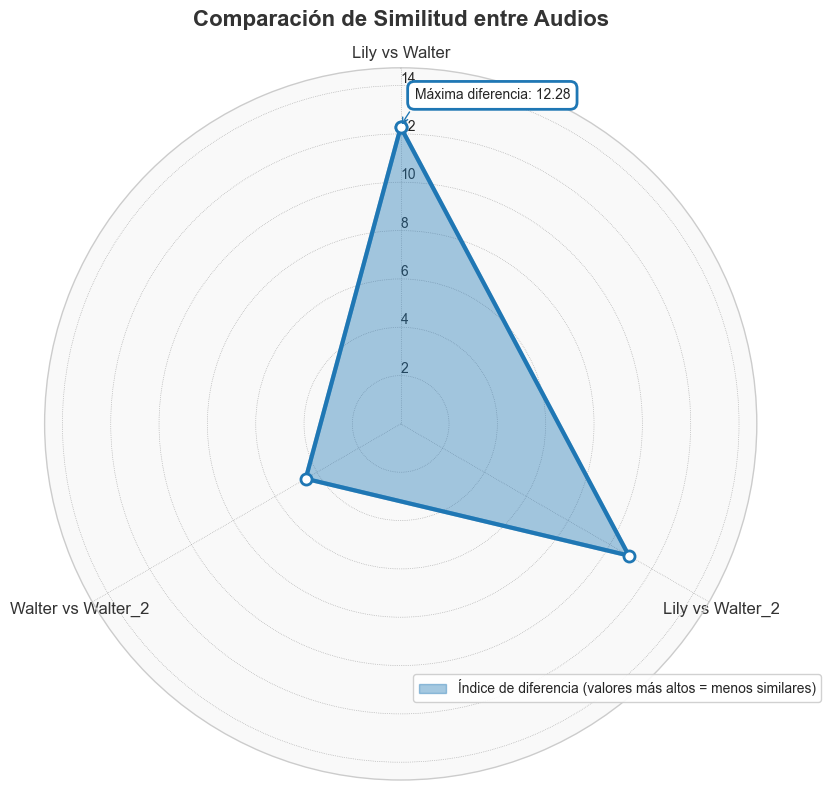

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Datos
differences = [12.28, 10.90, 4.54]
labels = ["Lily vs Walter", "Lily vs Walter_2", "Walter vs Walter_2"]

# Preparación de ángulos
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # Cerrar el círculo
differences += differences[:1]

# Crear figura
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))

# Diseño mejorado del radar
ax.fill(angles, differences, color='#1f77b4', alpha=0.4, edgecolor='#1f77b4', linewidth=3)
ax.plot(angles, differences, color='#1f77b4', linewidth=3, marker='o', markersize=8, markerfacecolor='white', markeredgewidth=2)

# Líneas radiales y anillos
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.set_rlabel_position(0)

# Configuración de ejes
ax.set_ylim(0, max(differences)*1.2)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=12, color='#333333')

# Cuadrícula y anillos
ax.grid(color='gray', linestyle=':', linewidth=0.5, alpha=0.7)
ax.set_facecolor('#f9f9f9')

# Título y leyenda
plt.title('Comparación de Similitud entre Audios', 
          fontsize=16, pad=30, color='#333333', fontweight='bold')

# Anotaciones explicativas
max_diff = max(differences[:-1])
min_diff = min(differences[:-1])
ax.annotate(f'Máxima diferencia: {max_diff}', xy=(angles[differences.index(max_diff)], max_diff), 
            xytext=(10, 20), textcoords='offset points', 
            bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='#1f77b4', lw=2),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', color='#1f77b4'))

# Leyenda de interpretación
legend_elements = [Patch(facecolor='#1f77b4', alpha=0.4, edgecolor='#1f77b4', 
                        label='Índice de diferencia (valores más altos = menos similares)')]
ax.legend(handles=legend_elements, loc='lower right', bbox_to_anchor=(1.1, 0.1), 
          frameon=True, framealpha=0.9)

# Ajustes finales
plt.tight_layout()
plt.savefig('actividad_6_grafica_radar.png') 
plt.show()

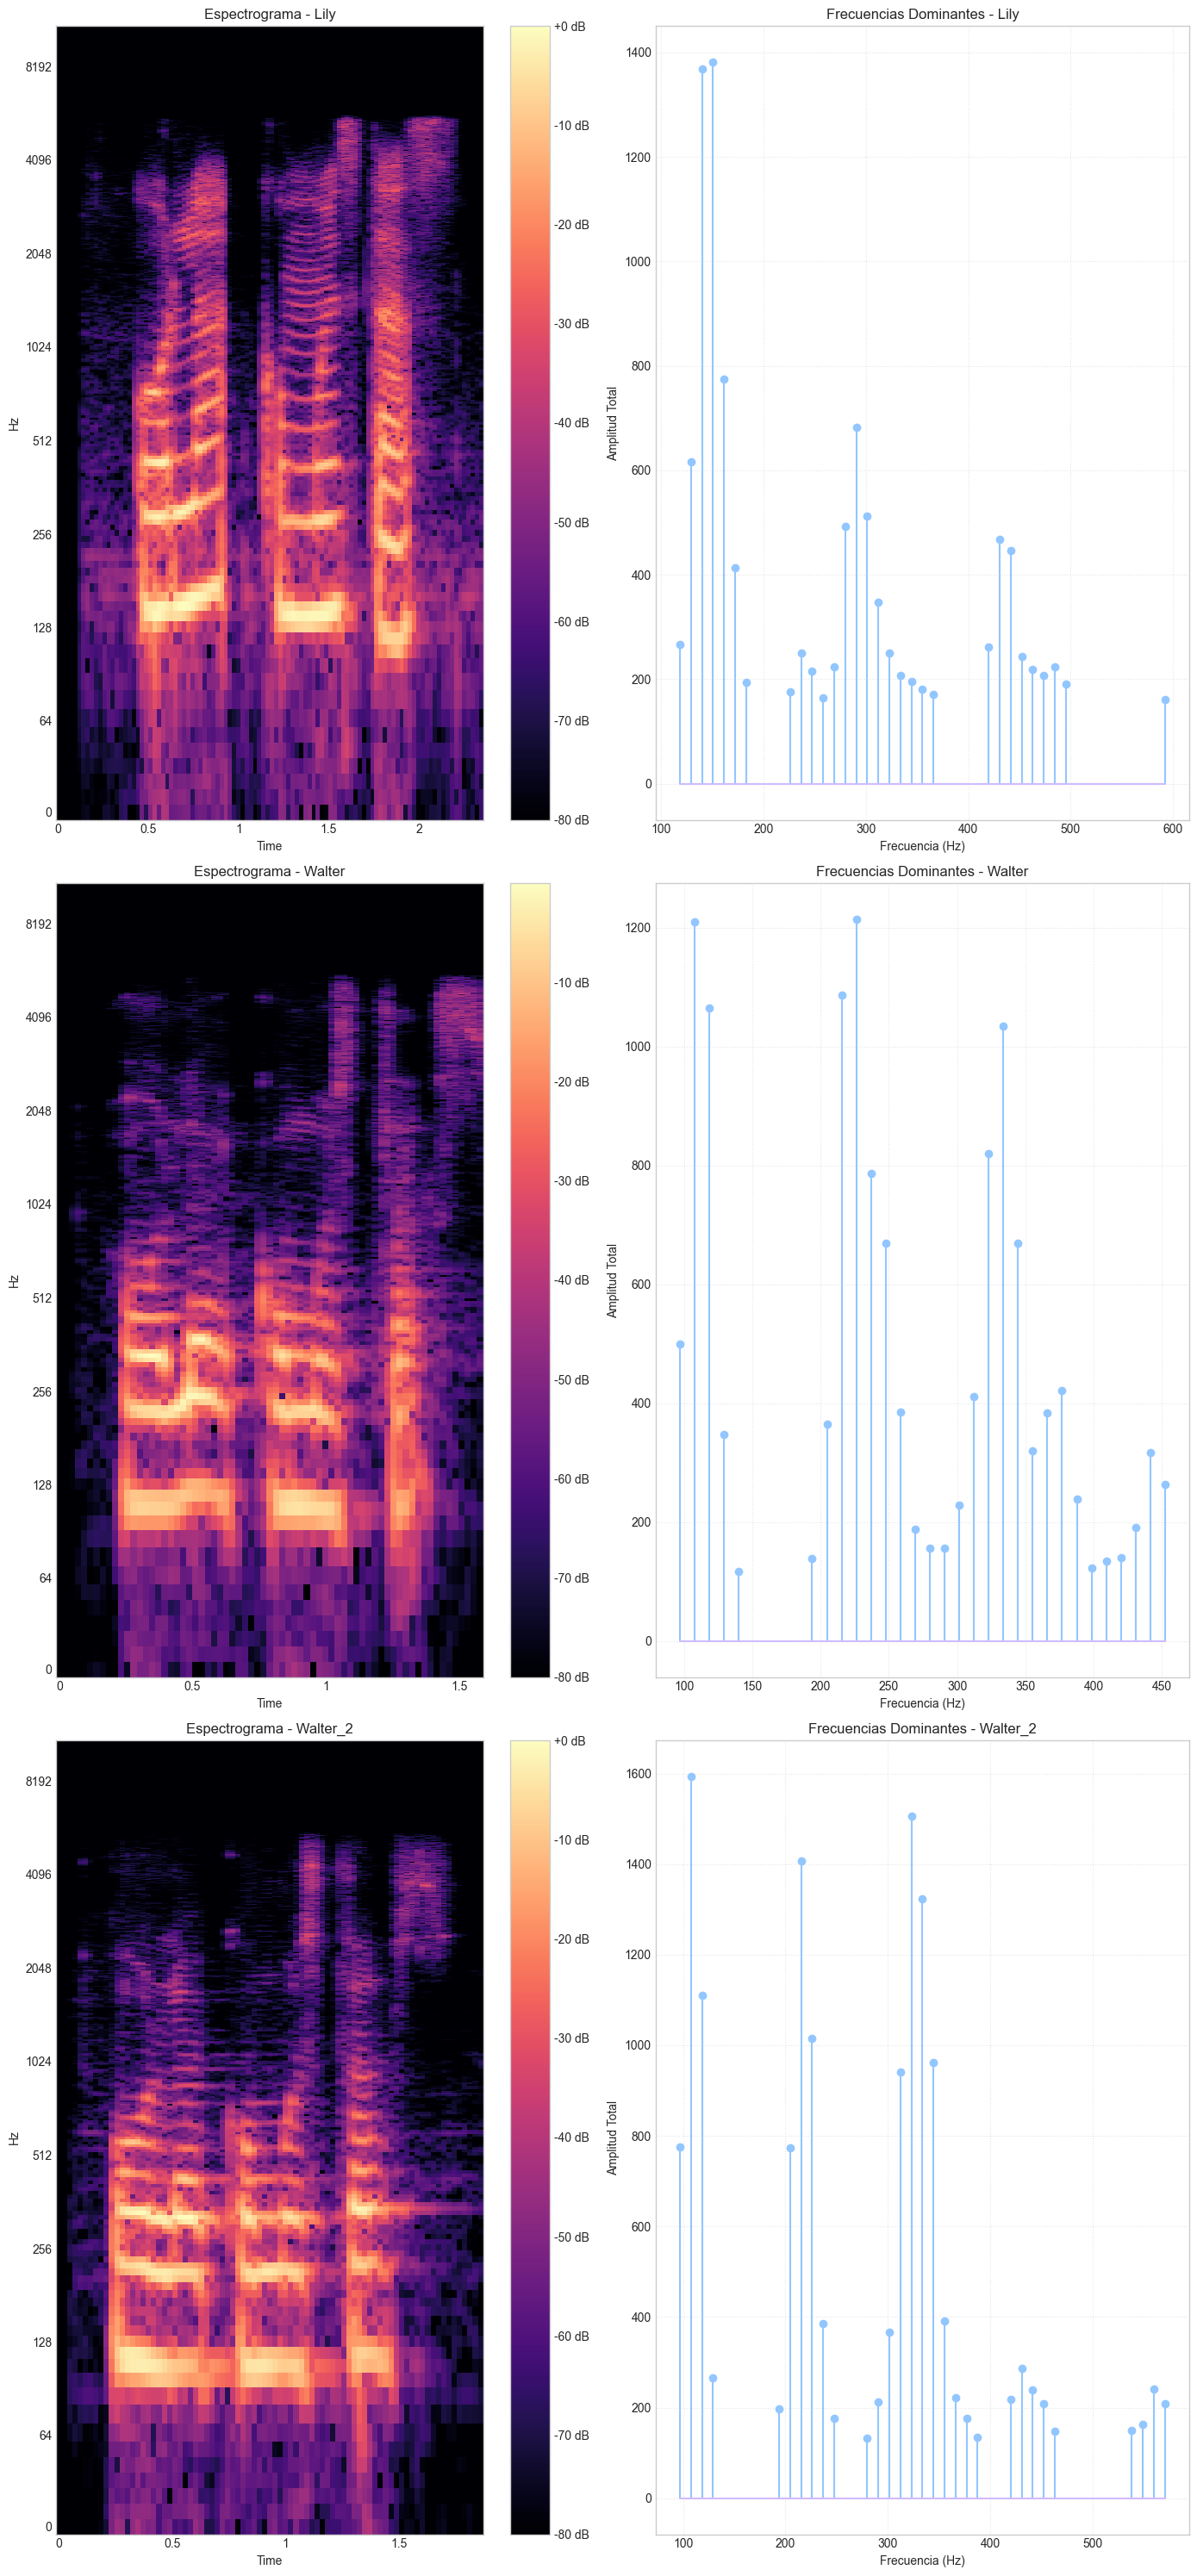

In [12]:
# Visualizar espectrogramas y espectros de frecuencia promedio
plt.figure(figsize=(14, 10 * len(audios)))  # Ajustar el tamaño de la figura

for i, (audio, name) in enumerate(zip(audios, audio_files)):
    # Espectrograma
    D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
    plt.subplot(len(audios), 2, 2*i+1)
    librosa.display.specshow(D, sr=target_sr, x_axis='time', y_axis='log', cmap='magma')
    plt.colorbar(format='%+2.0f dB')
    clean_name = name.replace('audio_', '').replace('.ogg', '').title()
    plt.title(f'Espectrograma - {clean_name}', fontsize=12)

    # Frecuencias representativas
    S = np.abs(librosa.stft(audio))
    freqs = librosa.fft_frequencies(sr=target_sr)
    sum_amplitudes = np.sum(S, axis=1)
    top_n = 30
    top_indices = np.argsort(sum_amplitudes)[-top_n:][::-1]
    top_frequencies = freqs[top_indices]
    top_amplitudes = sum_amplitudes[top_indices]

    plt.subplot(len(audios), 2, 2*i+2)
    plt.stem(top_frequencies, top_amplitudes, linefmt='C0-', markerfmt='C0o', basefmt='C3-')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Amplitud Total')
    plt.title(f'Frecuencias Dominantes - {clean_name}', fontsize=12)
    plt.grid(True, linestyle=':', alpha=0.5)

plt.tight_layout()
plt.savefig('actividad_6_espectrograma.png') 
plt.show()

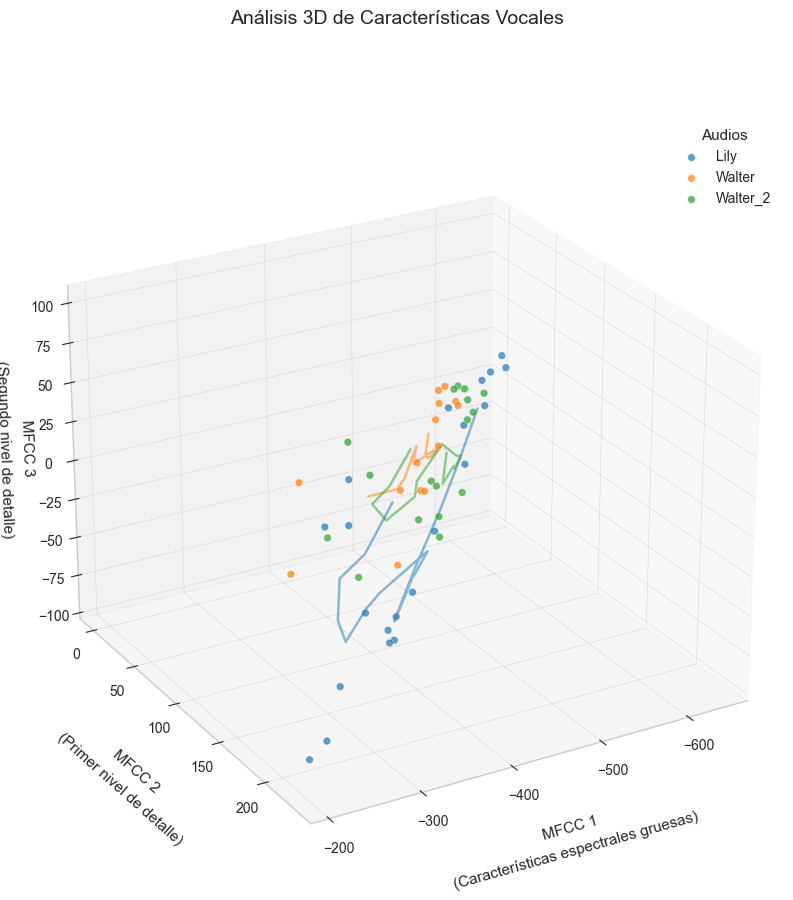

In [11]:
from mpl_toolkits.mplot3d import Axes3D

# Configuración de la figura
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')

# Paleta de colores y estilos mejorados
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Colores más distintivos
marker_sizes = [30, 30, 30]  # Tamaño de los puntos
alphas = [0.7, 0.7, 0.7]  # Transparencias

# Preprocesamiento para suavizado
window_size = 5  # Tamaño de la ventana para el suavizado

for i, (mfcc, name) in enumerate(zip(mfccs, audio_files)):
    # Suavizado de las trayectorias
    mfcc1_smooth = np.convolve(mfcc[0,::5], np.ones(window_size)/window_size, mode='valid')
    mfcc2_smooth = np.convolve(mfcc[1,::5], np.ones(window_size)/window_size, mode='valid')
    mfcc3_smooth = np.convolve(mfcc[2,::5], np.ones(window_size)/window_size, mode='valid')
    
    # Línea que conecta los puntos (trayectoria suavizada)
    ax.plot(
        mfcc1_smooth,
        mfcc2_smooth,
        mfcc3_smooth,
        color=colors[i],
        linestyle='-',
        linewidth=1.8,
        alpha=0.5
    )
    
    # Puntos de dispersión
    ax.scatter(
        mfcc[0,::5], 
        mfcc[1,::5], 
        mfcc[2,::5],
        color=colors[i],
        label=name.replace('audio_', '').replace('.ogg', '').title(),
        alpha=alphas[i],
        s=marker_sizes[i],
        edgecolor='white',  # Borde blanco para mejor visibilidad
        linewidth=0.3
    )


# Configuración de ejes y título
ax.set_xlabel('MFCC 1\n(Características espectrales gruesas)', fontsize=11, linespacing=1.8, labelpad=20)
ax.set_ylabel('MFCC 2\n(Primer nivel de detalle)', fontsize=11, linespacing=1.8, labelpad=20)
ax.set_zlabel('MFCC 3\n(Segundo nivel de detalle)', fontsize=11, linespacing=1.8, labelpad=5)

plt.suptitle('Análisis 3D de Características Vocales', fontsize=14, y=0.95)

legend = ax.legend(fontsize=10, loc='upper right', framealpha=0.9)
legend.set_title('Audios', prop={'size': 11})

ax.view_init(elev=25, azim=60)  # 25 grados de elevación, 60 grados de azimuth

ax.xaxis._axinfo["grid"].update({"linewidth":0.3, "alpha":0.3})
ax.yaxis._axinfo["grid"].update({"linewidth":0.3, "alpha":0.3})
ax.zaxis._axinfo["grid"].update({"linewidth":0.3, "alpha":0.3})

plt.tight_layout(pad=5.0) 
plt.show()